In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from pylab import *
from scipy import *
from scipy import optimize 

In [21]:
f = open('data.v4.txt', 'r')
lines = f.readlines()[1:]
f.close()
x = []
y = []
ery = []

In [22]:
for line in lines:
    a = line.split()
    x.append(float(a[0]))
    y.append(float(a[1]))
    ery.append(float(a[2]))


In [23]:
x1 = np.array(x)
y1 = np.array(y)
ery1 = np.array(ery)

In [24]:
powerlaw = lambda x, amp, index: amp * (x**index)

In [25]:
fitfunc = lambda p, x: p[0] + p[1] * x   
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

In [35]:
logx = log10(x1[1:])
logy = log10(y1[1:])
logyerr = log10(ery1[1:])

In [36]:
pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit, args=(logx, logy, logyerr), full_output=1)

In [37]:
pfinal = out[0]
covar = out[1]
print pfinal
print covar 

[ 0.63818668  1.76156968]
[[ 0.26699742 -0.22218563]
 [-0.22218563  0.23761284]]


In [42]:
index = pfinal[1]
amp = 10.0**pfinal[0]
indexErr = sqrt( covar[0][0] ) 
ampErr = sqrt( covar[1][1] ) * amp

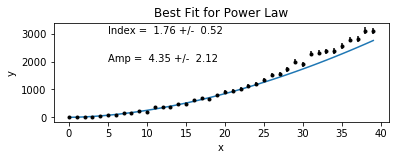

In [49]:
clf()
subplot(2, 1, 1)
plot(x1, powerlaw(x1, amp, index))
errorbar(x1, y1, yerr=ery1, fmt='k.')
text(5, 2000, 'Amp = %5.2f +/- %5.2f' % (amp, ampErr))
text(5, 3000, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
title('Best Fit for Power Law')
xlabel('x')
ylabel('y')
plt.show()

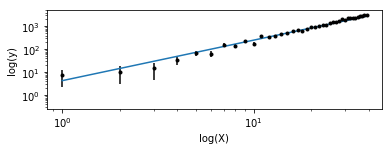

In [54]:
subplot(2,1,2)
loglog(x1, powerlaw(x1, amp, index))
errorbar(x1, y1, yerr=ery1, fmt='k.')
xlabel('log(X)')
ylabel('log(y)')
plt.show()

In [72]:
print 'a=',amp, '+/-',ampErr
print 'n=',index, '+/-',indexErr
x0 = #just stuck on the intercept part 
print 'x0='

a= 4.34697033684 +/- 2.11895451195
n= 1.76156967695 +/- 0.516717930228
y0=
